11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8181 - loss: 0.5975 - val_accuracy: 0.9576 - val_loss: 0.1392
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9457 - loss: 0.1773 - val_accuracy: 0.9663 - val_loss: 0.1154
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9575 - loss: 0.1377 - val_accuracy: 0.9714 - val_loss: 0.0949
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9663 - loss: 0.1097 - val_accuracy: 0.9715 - val_loss: 0.0916
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9705 - loss: 0.0919 - val_accuracy: 0.9741 - val_loss: 0.0863
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9733 - loss: 0.0882 - val_accuracy: 0.9743 - val_loss: 0.0870
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9755 - loss: 0.0779 - val_accuracy: 0.9754 - val_loss: 0.0843
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9769 - loss: 0.07

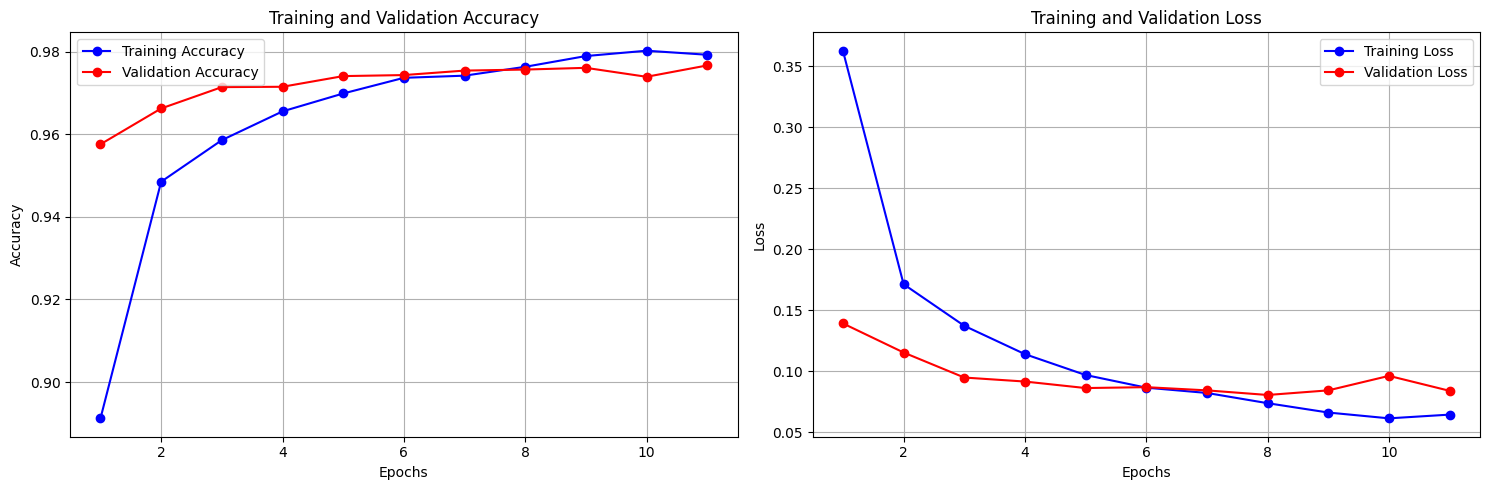


Detailed Performance Metrics:
------------------------------
Final Training Accuracy: 0.9793
Final Training Loss: 0.0645
Final Validation Accuracy: 0.9767
Final Validation Loss: 0.0840
Test Accuracy: 0.9766
Test Loss: 0.0767

Model Improvement:
------------------------------
Accuracy Improvement: 0.0880
Loss Improvement: 0.2983
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Per-Class Performance:
------------------------------
Digit 0:
  Precision: 0.9788
  Recall: 0.9878
  F1-score: 0.9832
Digit 1:
  Precision: 0.9876
  Recall: 0.9859
  F1-score: 0.9868
Digit 2:
  Precision: 0.9759
  Recall: 0.9826
  F1-score: 0.9792
Digit 3:
  Precision: 0.9743
  Recall: 0.9743
  F1-score: 0.9743
Digit 4:
  Precision: 0.9824
  Recall: 0.9684
  F1-score: 0.9754
Digit 5:
  Precision: 0.9808
  Recall: 0.9753
  F1-score: 0.9781
Digit 6:
  Precision: 0.9812
  Recall: 0.9791
  F1-score: 0.9801
Digit 7:
  Precision: 0.9682
  Recall: 0.9776
  F1-score: 0.9729
Digit 8:
  Precision: 0.9781
  Recall: 0.9641
  F1-sc

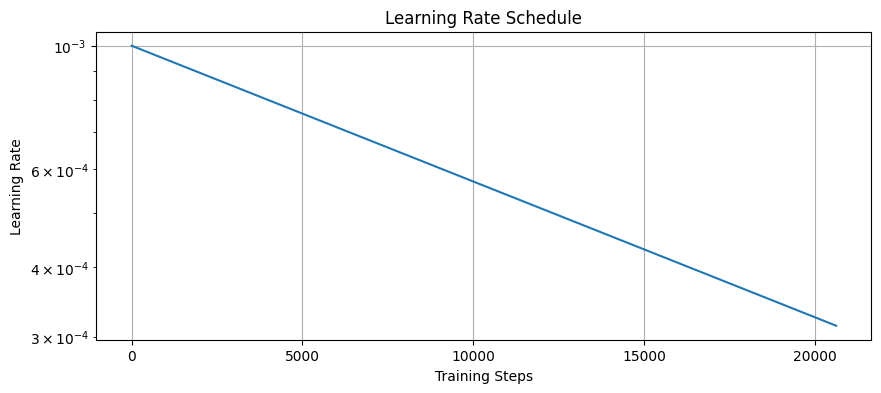

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


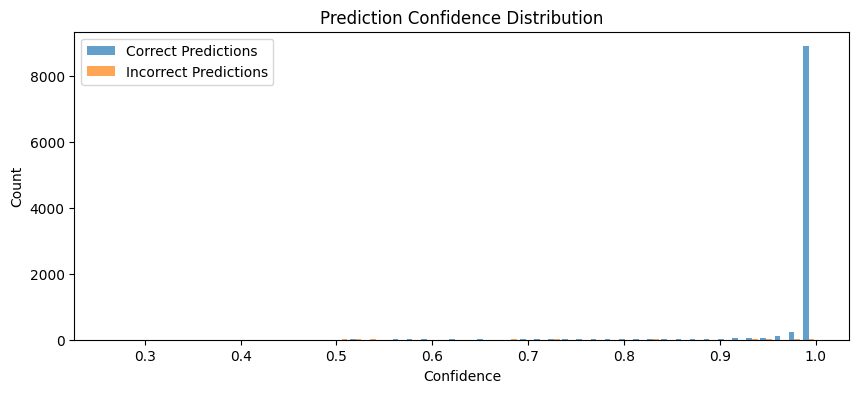


Confidence Analysis:
------------------------------
Mean confidence (correct predictions): 0.9883
Mean confidence (incorrect predictions): 0.7272


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model with validation data
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Detailed accuracy and loss analysis
def analyze_performance(history, x_test, y_test, model):
    # Training history metrics
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Final test set evaluation
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Plot training curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    ax1.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    ax1.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    ax1.set_title('Training and Validation Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Loss plot
    ax2.plot(epochs, train_loss, 'bo-', label='Training Loss')
    ax2.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    ax2.set_title('Training and Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("\nDetailed Performance Metrics:")
    print("-" * 30)
    print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
    print(f"Final Training Loss: {train_loss[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Final Validation Loss: {val_loss[-1]:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Calculate improvement
    accuracy_improvement = train_acc[-1] - train_acc[0]
    loss_improvement = train_loss[0] - train_loss[-1]

    print("\nModel Improvement:")
    print("-" * 30)
    print(f"Accuracy Improvement: {accuracy_improvement:.4f}")
    print(f"Loss Improvement: {loss_improvement:.4f}")

    # Per-class accuracy
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    class_report = classification_report(y_test, y_pred_classes, output_dict=True)

    print("\nPer-Class Performance:")
    print("-" * 30)
    for i in range(10):
        print(f"Digit {i}:")
        print(f"  Precision: {class_report[str(i)]['precision']:.4f}")
        print(f"  Recall: {class_report[str(i)]['recall']:.4f}")
        print(f"  F1-score: {class_report[str(i)]['f1-score']:.4f}")

# Calculate learning rate schedule
def plot_learning_rate():
    initial_learning_rate = 0.001  # Adam's default learning rate
    decay_steps = len(x_train) // 32  # steps per epoch
    decay_rate = 0.9

    steps = range(len(history.history['loss']) * decay_steps)
    lr_schedule = [initial_learning_rate * (decay_rate ** (step / decay_steps))
                  for step in steps]

    plt.figure(figsize=(10, 4))
    plt.plot(steps, lr_schedule)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Training Steps')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

# Analyze model performance
analyze_performance(history, x_test, y_test, model)

# Plot learning rate schedule
plot_learning_rate()

# Calculate and plot prediction confidence
def analyze_prediction_confidence():
    predictions = model.predict(x_test)
    confidence = np.max(predictions, axis=1)
    correct = (np.argmax(predictions, axis=1) == y_test)

    plt.figure(figsize=(10, 4))
    plt.hist([confidence[correct], confidence[~correct]],
             label=['Correct Predictions', 'Incorrect Predictions'],
             bins=50, alpha=0.7)
    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    print("\nConfidence Analysis:")
    print("-" * 30)
    print(f"Mean confidence (correct predictions): {np.mean(confidence[correct]):.4f}")
    print(f"Mean confidence (incorrect predictions): {np.mean(confidence[~correct]):.4f}")

# Analyze prediction confidence
analyze_prediction_confidence()